**Objective: **

Build a machine learning model to predict the
 aggregate rating of a restaurant based on other features.


1. Preprocess the dataset by handling missing values,
 encoding categorical variables, and splitting the data
 into training and testing sets.

 2. Select a regression algorithm (e.g., linear regression,
 decision tree regression) and train it on the training data.
 3. Evaluate the model's performance using appropriate
 regression metrics (e.g., mean squared error, R-squared)
 on the testing data.
 4. Interpret the model's results and analyze the most
 influential features affecting restaurant ratings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [75]:
data=pd.read_csv('/content/Dataset .csv')

In [76]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [77]:

columns_to_drop = [
    'Restaurant ID',
    'Restaurant Name',
     'Country Code',
    'Currency',
    'Is delivering now',
    'Switch to order menu',
    'Address',
    'Locality',
    'Locality Verbose',
    'Rating color',
    'Latitude',
    'Longitude'
]



In [78]:
data=data.drop(columns=columns_to_drop)

In [80]:
data.head()

,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes
0,Makati City,"French, Japanese, Desserts",1100,Yes,No,3,4.8,Excellent,314
1,Makati City,Japanese,1200,Yes,No,3,4.5,Excellent,591
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Yes,No,4,4.4,Very Good,270
3,Mandaluyong City,"Japanese, Sushi",1500,No,No,4,4.9,Excellent,365
4,Mandaluyong City,"Japanese, Korean",1500,Yes,No,4,4.8,Excellent,229


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  9551 non-null   object 
 1   Cuisines              9542 non-null   object 
 2   Average Cost for two  9551 non-null   int64  
 3   Has Table booking     9551 non-null   object 
 4   Has Online delivery   9551 non-null   object 
 5   Price range           9551 non-null   int64  
 6   Aggregate rating      9551 non-null   float64
 7   Rating text           9551 non-null   object 
 8   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 671.7+ KB


In [81]:
data.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [82]:
data.describe(include='object')

,City,Cuisines,Has Table booking,Has Online delivery,Rating text
count,9551,9542,9551,9551,9551
unique,141,1825,2,2,6
top,New Delhi,North Indian,No,No,Average
freq,5473,936,8393,7100,3737


In [83]:
data.shape

(9551, 9)

In [84]:
data['Cuisine List'] = data['Cuisines'].apply(lambda x: [c.strip() for c in str(x).split(',')] if pd.notnull(x) else [])

data['Cuisine Count'] = data['Cuisine List'].apply(len)

data[['Cuisines', 'Cuisine List', 'Cuisine Count']].head()

,Cuisines,Cuisine List,Cuisine Count
0,"French, Japanese, Desserts","[French, Japanese, Desserts]",3
1,Japanese,[Japanese],1
2,"Seafood, Asian, Filipino, Indian","[Seafood, Asian, Filipino, Indian]",4
3,"Japanese, Sushi","[Japanese, Sushi]",2
4,"Japanese, Korean","[Japanese, Korean]",2


In [85]:
data.head()

,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes,Cuisine List,Cuisine Count
0,Makati City,"French, Japanese, Desserts",1100,Yes,No,3,4.8,Excellent,314,"[French, Japanese, Desserts]",3
1,Makati City,Japanese,1200,Yes,No,3,4.5,Excellent,591,[Japanese],1
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Yes,No,4,4.4,Very Good,270,"[Seafood, Asian, Filipino, Indian]",4
3,Mandaluyong City,"Japanese, Sushi",1500,No,No,4,4.9,Excellent,365,"[Japanese, Sushi]",2
4,Mandaluyong City,"Japanese, Korean",1500,Yes,No,4,4.8,Excellent,229,"[Japanese, Korean]",2


In [86]:
data=data.drop(columns=['Cuisines','Cuisine List'])

In [87]:
data.head()

,City,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes,Cuisine Count
0,Makati City,1100,Yes,No,3,4.8,Excellent,314,3
1,Makati City,1200,Yes,No,3,4.5,Excellent,591,1
2,Mandaluyong City,4000,Yes,No,4,4.4,Very Good,270,4
3,Mandaluyong City,1500,No,No,4,4.9,Excellent,365,2
4,Mandaluyong City,1500,Yes,No,4,4.8,Excellent,229,2


# EDA


## missing


In [88]:
data.isnull().sum()

,0
City,0
Average Cost for two,0
Has Table booking,0
Has Online delivery,0
Price range,0
Aggregate rating,0
Rating text,0
Votes,0
Cuisine Count,0


In [89]:
data=data.dropna()

In [23]:
data.isnull().sum()

,0
City,0
Average Cost for two,0
Has Table booking,0
Has Online delivery,0
Price range,0
Aggregate rating,0
Votes,0
Cuisine Count,0


## encoding


In [90]:
binary_cols = ['Has Table booking', 'Has Online delivery']
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [91]:
data

,City,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes,Cuisine Count
0,Makati City,1100,1,0,3,4.8,Excellent,314,3
1,Makati City,1200,1,0,3,4.5,Excellent,591,1
2,Mandaluyong City,4000,1,0,4,4.4,Very Good,270,4
3,Mandaluyong City,1500,0,0,4,4.9,Excellent,365,2
4,Mandaluyong City,1500,1,0,4,4.8,Excellent,229,2
...,...,...,...,...,...,...,...,...,...
9546,��stanbul,80,0,0,3,4.1,Very Good,788,1
9547,��stanbul,105,0,0,3,4.2,Very Good,1034,3
9548,��stanbul,170,0,0,4,3.7,Good,661,2
9549,��stanbul,120,0,0,4,4.0,Very Good,901,1


In [92]:
data['City'].value_counts()

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
...,...
Lakes Entrance,1
Mohali,1
Panchkula,1


In [93]:
data['Rating text'].value_counts()

,count
Rating text,
Average,3737
Not rated,2148
Good,2100
Very Good,1079
Excellent,301
Poor,186


In [94]:
rating_map = {
    "Not rated": 0,
    "Poor": 1,
    "Average": 2,
    "Good": 3,
    "Very Good": 4,
    "Excellent": 5
}

data["Rating text"] = data["Rating text"].map(rating_map)

In [27]:
from sklearn.preprocessing import LabelEncoder

In [95]:
le_city = LabelEncoder()
data['City'] = le_city.fit_transform(data['City'])

In [117]:
data

,City,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes,Cuisine Count
0,73,1100,1,0,3,4.8,5,314,3
1,73,1200,1,0,3,4.5,5,591,1
2,75,4000,1,0,4,4.4,4,270,4
3,75,1500,0,0,4,4.9,5,365,2
4,75,1500,1,0,4,4.8,5,229,2
...,...,...,...,...,...,...,...,...,...
9546,140,80,0,0,3,4.1,4,788,1
9547,140,105,0,0,3,4.2,4,1034,3
9548,140,170,0,0,4,3.7,3,661,2
9549,140,120,0,0,4,4.0,4,901,1


# Splitting

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x=data.drop(columns=['Aggregate rating'])
y=data['Aggregate rating']

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [121]:
x_train

,City,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating text,Votes,Cuisine Count
1115,43,1900,1,0,3,2,56,3
7633,88,100,0,0,1,2,4,1
8267,89,100,0,0,1,0,0,2
7209,88,250,0,0,1,0,1,2
6242,88,600,0,0,2,2,75,2
...,...,...,...,...,...,...,...,...
5734,88,200,0,0,1,0,0,2
5191,88,650,0,1,2,3,75,2
5390,88,250,0,0,1,0,0,1
860,35,1600,0,0,4,4,66,4


#model building

##linear regression

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [123]:
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [124]:
y_lr_pred=lr.predict(x_test)

In [125]:
r2_lr=r2_score(y_test,y_lr_pred)
mse_lr=mean_squared_error(y_test,y_lr_pred)

In [126]:
print(f'R2 score: {r2_lr:.2f}')
print(f'mse score: {mse_lr:.2f}')

R2 score: 0.90
mse score: 0.23


## decision tree

In [127]:
from sklearn.tree import DecisionTreeRegressor

In [128]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [129]:
x_train

,City,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating text,Votes,Cuisine Count
1115,43,1900,1,0,3,2,56,3
7633,88,100,0,0,1,2,4,1
8267,89,100,0,0,1,0,0,2
7209,88,250,0,0,1,0,1,2
6242,88,600,0,0,2,2,75,2
...,...,...,...,...,...,...,...,...
5734,88,200,0,0,1,0,0,2
5191,88,650,0,1,2,3,75,2
5390,88,250,0,0,1,0,0,1
860,35,1600,0,0,4,4,66,4


In [130]:
y_train

,Aggregate rating
1115,3.3
7633,3.0
8267,0.0
7209,0.0
6242,2.5
...,...
5734,0.0
5191,3.8
5390,0.0
860,4.4


In [131]:
y_dt_pred=dt.predict(x_test)

In [134]:
r2_dt=r2_score(y_test,y_dt_pred)
mse_dt=mean_squared_error(y_test,y_dt_pred)

In [135]:
print(f'R2 score: {r2_dt:.2f}')
print(f'mse score: {mse_dt:.2f}')

R2 score: 0.98
mse score: 0.05


In [136]:
import matplotlib.pyplot as plt
importances = dt.feature_importances_
feature_names = x.columns
indices = np.argsort(importances)[::-1]

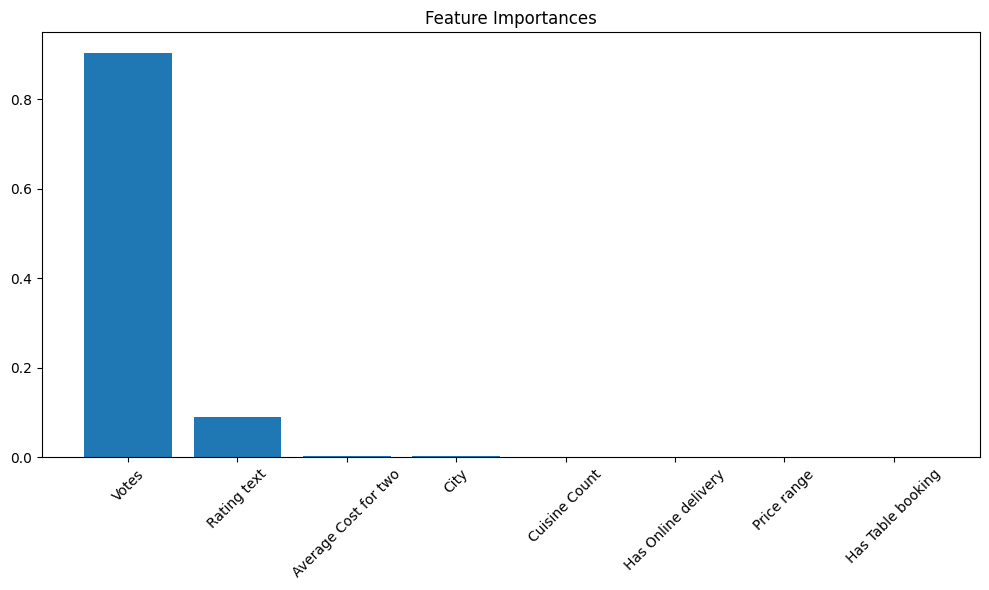

In [137]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

In [138]:
[(feature_names[i], round(importances[i], 3)) for i in indices]

[('Votes', np.float64(0.904)),
 ('Rating text', np.float64(0.089)),
 ('Average Cost for two', np.float64(0.003)),
 ('City', np.float64(0.002)),
 ('Cuisine Count', np.float64(0.001)),
 ('Has Online delivery', np.float64(0.0)),
 ('Price range', np.float64(0.0)),
 ('Has Table booking', np.float64(0.0))]

In [140]:
dt.predict([[88,	600,	0	,1,	2,2,	195,	2]])

array([3.4])

In [142]:
import pickle

pickle.dump(dt,open('model.pkl','wb'))

In [143]:
pickle.dump(le_city,open('le_city.pkl','wb'))